In [1]:
from qiskit.circuit.random import random_circuit
import scipy 
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute
from qiskit import Aer
from qiskit.quantum_info import Statevector, DensityMatrix
import qiskit 

In [499]:
ansatz = QuantumCircuit(2)
ansatz.h(0)
ansatz.crx(1, 0,1)
ansatz.u(1,1,1,0)
ansatz.u(1,1,1,1)

ansatz.draw()

┌───┐         ┌──────────┐
q_0: ┤ H ├────■────┤ U(1,1,1) ├
     └───┘┌───┴───┐├──────────┤
q_1: ─────┤ Rx(1) ├┤ U(1,1,1) ├
          └───────┘└──────────┘

In [104]:
from matplotlib import rc
from matplotlib.ticker import MultipleLocator 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from matplotlib.transforms import Bbox

In [442]:
m = get_uab(2)

np.allclose(np.eye(len(m)), m.dot(m.T.conj()))
m

array([[-0.9110574 ,  0.41178271, -0.01843812,  0.00833372],
       [ 0.41178271,  0.9110574 ,  0.00833372,  0.01843812],
       [ 0.01843812, -0.00833372, -0.9110574 ,  0.41178271],
       [-0.00833372, -0.01843812,  0.41178271,  0.9110574 ]])

In [486]:
random_unitary(4)

array([[ 0.4181693 ,  0.58658763,  0.66213032,  0.20647717],
       [-0.06943399,  0.12917274, -0.35812492,  0.92208452],
       [-0.09832456,  0.7796023 , -0.52822015, -0.32177011],
       [ 0.90035861, -0.17734035, -0.39282751, -0.05992757]])

6 param + alpha 

vs 




In [250]:
def get_u(n):
#     z = (scipy.randn(n,n)+ 1j*scipy.randn(n,n))/scipy.sqrt(2.0)
    z = np.random.randn(n,n)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    return q

def get_uab(n):
    UaUb = np.kron(get_u(2),get_u(2))
    return  UaUb  

In [264]:
m = get_uab(2)

np.allclose(np.eye(len(m)), m.dot(m.T.conj()))
m

array([[ 0.46136022,  0.24001435, -0.75772745, -0.39419408],
       [-0.24001435,  0.46136022,  0.39419408, -0.75772745],
       [-0.75772745, -0.39419408, -0.46136022, -0.24001435],
       [ 0.39419408, -0.75772745,  0.24001435, -0.46136022]])

In [374]:
a = np.zeros((100000,16))
b = np.zeros((100000,16))

for cnt in range(100000):
    a[cnt] = get_uab(2).flatten()*np.sqrt(2.0)
    b[cnt] = random_unitary(4).flatten()

In [375]:
np.mean(a,axis=0)

array([ 0.00353563,  0.00010592, -0.00126645, -0.0016569 , -0.00019378,
       -0.00244822, -0.00026619,  0.00181963,  0.00267248,  0.0005696 ,
        0.00249122, -0.00194086,  0.00197343, -0.00012126, -0.00332102,
       -0.00325255])

In [376]:
np.mean(b,axis=0)

array([-0.00187046,  0.00026703,  0.00040625,  0.00133342,  0.00104205,
        0.00292356,  0.00060578, -0.00056116, -0.00128973, -0.00040787,
        0.00552176, -0.00026824,  0.00224864,  0.00219302,  0.0003386 ,
        0.00050505])

(array([ 5139.,  9008., 11206., 12079., 12622., 12626., 12113., 10814.,
         9067.,  5326.]),
 array([-9.99015810e-01, -7.99145881e-01, -5.99275953e-01, -3.99406024e-01,
        -1.99536095e-01,  3.33833063e-04,  2.00203762e-01,  4.00073690e-01,
         5.99943619e-01,  7.99813547e-01,  9.99683476e-01]),
 <BarContainer object of 10 artists>)

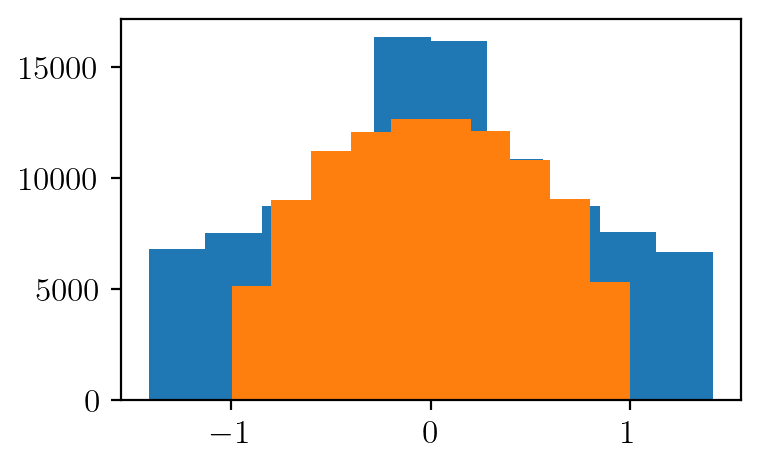

In [377]:
plt.hist(a[:,2])
plt.hist(b[:,2])

In [378]:
scipy.stats.ks_2samp(a[:,2], b[:,2], alternative='two-sided', mode='auto')

KstestResult(statistic=0.11080999999999999, pvalue=0.0)

In [265]:
def random_unitary(N):
    """
        Return a Haar distributed random unitary from U(N)
    """

    Z = np.random.randn(N, N) #+ 1.0j * np.random.randn(N, N)
    [Q, R] = np.linalg.qr(Z)
    D = np.diag(np.diagonal(R) / np.abs(np.diagonal(R)))
    return np.dot(Q, D)

def haar_integral(num_qubits, samples):
    """
        Return calculation of Haar Integral for a specified number of samples.
    """

    N = 2**num_qubits
    randunit_density = np.zeros((N, N), dtype=complex)

    
    zero_state = np.zeros(N, dtype=complex)
    zero_state[0] = 1
    
    for _ in range(samples):
      A = np.matmul(zero_state, random_unitary(N)).reshape(-1,1)
      randunit_density += np.kron(A, A.conj().T) 

    randunit_density/=samples

    return randunit_density

def haar_integral_tensot(num_qubits, samples):
    """
        Return calculation of Haar Integral for a specified number of samples.
    """

    N = 2**num_qubits
    randunit_density = np.zeros((N, N), dtype=complex)

    
    zero_state = np.zeros(N, dtype=complex)
    zero_state[0] = 1
    
    for _ in range(samples):
      A = np.matmul(zero_state, get_uab(2)).reshape(-1,1)
      randunit_density += np.kron(A, A.conj().T) 

    randunit_density/=samples

    return randunit_density

    
def pqc_integral(num_qubits, ansatze, size, samples):
    """
        Return calculation of Integral for a PQC over the uniformly sampled 
        the parameters θ for the specified number of samples.
    """

    N = num_qubits
    randunit_density = np.zeros((2**N, 2**N), dtype=complex)

    for _ in range(samples):
        params = np.random.uniform(0, np.pi, size)
        ansatz = ansatze(params, N)
        result = execute(ansatz, 
                       backend=Aer.get_backend('statevector_simulator')).result()
        U = np.reshape(result.get_statevector(ansatz, decimals=5), (-1,1))
            
        randunit_density += np.kron(U, U.conj().T)

    return randunit_density/samples

def pqc_from_sample(data):
    samples = len(data)
    randunit_density = np.zeros((2**2, 2**2), dtype=complex)
    for cnt,state in enumerate(range(samples)):
        result = data[cnt]
        U = np.reshape(result, (-1,1))
        randunit_density += np.kron(U, U.conj().T)
    return randunit_density/samples

In [266]:
print(np.linalg.norm(haar_integral(2, int(1e5)) - haar_integral_tensot(2, int(1e5))))

0.004616419185656971


In [268]:
haar_integral(2, int(1))

array([[ 0.04928691+0.j, -0.11127953+0.j, -0.12443921+0.j,
         0.13780225+0.j],
       [-0.11127953+0.j,  0.2512459 +0.j,  0.28095769+0.j,
        -0.31112866+0.j],
       [-0.12443921+0.j,  0.28095769+0.j,  0.31418313+0.j,
        -0.34792205+0.j],
       [ 0.13780225+0.j, -0.31112866+0.j, -0.34792205+0.j,
         0.38528406+0.j]])

In [187]:
print(np.linalg.norm(haar_integral(2, int(1e5)) - haar_integral(2, int(1e5))))

0.0033850914834132537


In [188]:
haar_int = haar_integral(2, int(1e5))

In [189]:
print(np.linalg.norm(haar_int - pqc_from_sample(state_noiseless)))
print(np.linalg.norm(haar_int - pqc_from_sample(state_noisy)))
print(np.linalg.norm(haar_int - pqc_from_sample(state_rc)))

0.7611090960660314
0.007463432743266885
0.16211236553580072


In [155]:
np.linalg.norm(haar_integral(2, 2048) - pqc_integral(2, ansatz_rho, 1, 2048))

0.753688950613959

In [156]:
np.linalg.norm(haar_integral(2, 2048) - pqc_integral(2, ansatz_rhor, 1, 2048))

0.05943032211302239

In [151]:
def ansatz_rho(params, N):
    params = np.array(params).reshape(1)
    ansatz = QuantumCircuit(2)
    ansatz.h(0)
    ansatz.crx(params[0], 0,1)
    return ansatz

    
def ansatz_rhos(params, N):
    params = np.array(params).reshape(1)
    ansatz = QuantumCircuit(2)
    ansatz.h(0)
    ansatz.crx(params[0], 0,1)
    ansatz.
    return ansatz
    
def ansatz_rhor(params, N):
    return qiskit.circuit.random.random_circuit(2,5)

In [138]:
def ansatz2(params, num_qubits): 

    params = np.array(params).reshape(1)
    ansatz = QuantumCircuit(num_qubits, num_qubits)
    ansatz.h(0)
    ansatz.cx(0, 1)
    ansatz.rx(params[0], 0)

    return ansatz

np.linalg.norm(haar_integral(2, 2048) - pqc_integral(2, ansatz2, 1, 2048))

0.49975894752736505

In [162]:
state_noiseless = [qiskit.quantum_info.DensityMatrix(np.reshape(state,(4,4))).to_statevector() for state in rho_arr_noiseless[::10]]
state_noisy = [qiskit.quantum_info.DensityMatrix(np.reshape(state,(4,4))).to_statevector() for state in rho_arr_noisy[::10]]
state_rc = [qiskit.quantum_info.DensityMatrix(np.reshape(state,(4,4))).to_statevector() for state in random_circ_arr]

In [159]:
random_circ_arr.shape

(210, 16)

In [235]:
test_conc = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in rho_arr_noisy[::100]])

32/32 [==============================] - 0s 573us/step


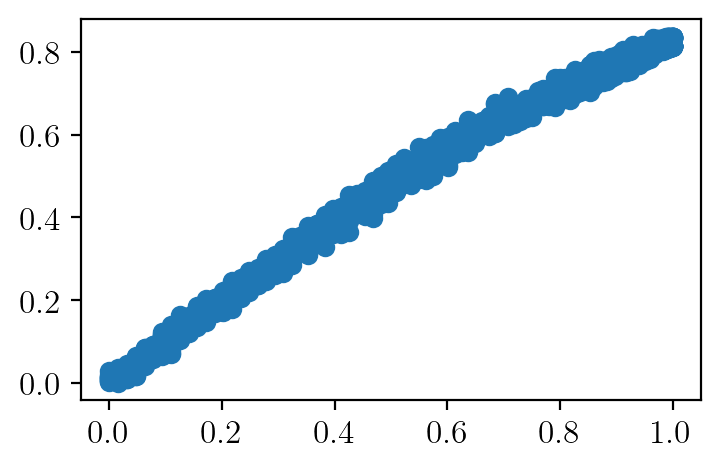

In [269]:
encoder, decoder = vae_mlp_4x4(1, "tanh", "linear")

encoder.load_weights("/home/felix/Downloads/test/encoder_test_07_new.h5")
decoder.load_weights("/home/felix/Downloads/test/decoder_test_07_new.h5")

vae_test = VAE(encoder, decoder, 0.7)
vae_test.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
vae_test.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean_test, _, _ = vae_test.encoder.predict(rho_arr_noisy[::100])

plt.scatter(test_conc,np.abs(z_mean_test[:,0]))

In [155]:
dep_arr = []
for i in range(1000):
    UaUb = np.kron(get_u(2),get_u(2))
    q =  QuantumRegister(2,"qreg")
    qc = QuantumCircuit(q)

    customUnitary = Operator(UaUb)
    qc.unitary(customUnitary, [q[0], q[1]], label='custom')

    newCircuit = transpile(qc, basis_gates=['rx','ry','rz'], optimization_level = 3)
    # newCircuit.draw()
    
    dep_arr.append(newCircuit.depth())
dep_arr = np.array(dep_arr)
np.mean(dep_arr), np.max(dep_arr)

backend = Aer.get_backend('unitary_simulator')

job = execute(newCircuit, backend, shots=8192)
result = job.result()

print(result.get_unitary(newCircuit,3))

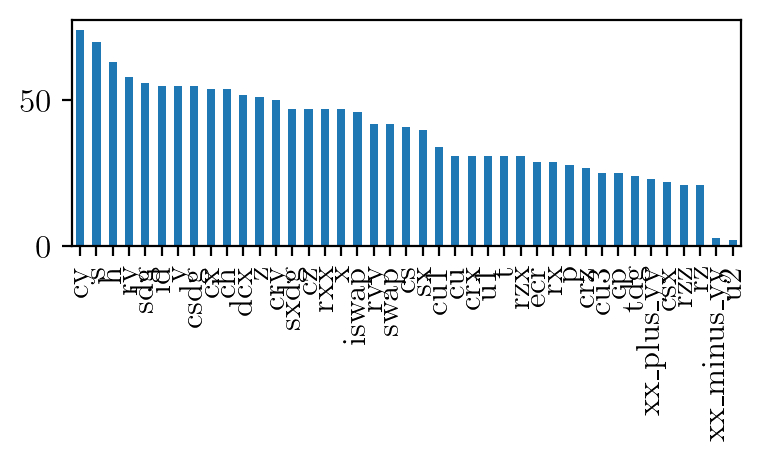

In [391]:
# import pandas as pd
pd.Series(gate_arr).value_counts(sort=True).plot(kind='bar')
plt.tight_layout()

In [389]:
def get_u(n):
    z = np.random.randn(n,n)/np.sqrt(2.0)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    return q

def get_random_cdm():
    state = Statevector.from_int(0, 2**2)
    rand_circ = random_circuit(2,6)
    state = state.evolve(rand_circ)
    return DensityMatrix(state), rand_circ

        
def gen_data_cdm():
    cnt = 0 
    data_arr = np.zeros((210,16))
    conc_arr = np.zeros((210))
    gate_arr = []
    for c_arr in selected_conc_noisy:
        for c in c_arr:
            Found = False
            while not Found:
                trial_state, trial_circ = get_random_cdm()
                if np.abs(np.array(trial_state).imag).sum() == 0 and np.isclose(qiskit.quantum_info.concurrence(trial_state),c,atol=2e-2):
                    data_arr[cnt] = np.array(trial_state).real.flatten()
                    conc_arr[cnt] = qiskit.quantum_info.concurrence(trial_state)
                    gates = [str(i.operation.name) for i in trial_circ.data]
                    gate_arr += gates
                    
                    cnt += 1 
                    Found = True
                    print(cnt)
            
    return data_arr, conc_arr, gate_arr


random_circ_arr, conc_random_circ_arr, gate_arr = gen_data_cdm()
# np.save("/home/felix/PycharmProjects/qcvae/conc_random_circ_arr.npy",e)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210


In [2]:
%matplotlib inline
# %matplotlib notebook
from sklearn.model_selection import train_test_split
import numpy as np
import qutip as qt
from sklearn.manifold import TSNE
from vae import * 

2023-05-12 16:29:10.051283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 16:29:10.180689: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-12 16:29:10.183353: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-12 16:29:10.183365: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
fig_size_dim    = 4
golden_ratio    = (1+np.sqrt(5))/2
fig_size        = (fig_size_dim, fig_size_dim/golden_ratio)

def plot_style():
    font_size       = 12
    dpi             = 200

    params = {'figure.figsize': fig_size,
              'figure.dpi': dpi,
              'savefig.dpi': dpi,
              'font.size': font_size,
              'font.family': "serif",
              'figure.titlesize': font_size,
              'legend.fontsize': font_size,
              'axes.labelsize': font_size,
              'axes.titlesize': font_size,
              'xtick.labelsize': font_size,
              'ytick.labelsize': font_size,
              'text.usetex': True,
             }

    plt.rcParams.update(params)
plot_style()

In [4]:
n_angle = 101
n_samples = 1000
scan_arr = np.linspace(0, np.pi, n_angle)
alpha_arr = np.zeros(101000)
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1

# Noiseless Dataset

Load Dataset

In [5]:
rho_arr_noiseless = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
X_train_noiseless, X_test_noiseless, y_train_noiseless, y_test_noiseless = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
concurrence_noiseless_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test_noiseless])

Define Hyperparameters and load trained VAE:

In [12]:
batch_size = 64
beta = 0.0
learning_rate = 0.0001
lat_dim = 1

encoder, decoder = vae_mlp_4x4(lat_dim, "relu", "tanh")
encoder.load_weights("encoder_noiseless.h5")
decoder.load_weights("decoder_noiseless.h5")

vae_noiseless = VAE(encoder, decoder, beta)
vae_noiseless.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_noiseless.fit(X_test_noiseless, epochs=1, batch_size=64, verbose=1) 

z_mean_noiseless, z_log_var_noiseless, z_noiseless = vae_noiseless.encoder.predict(X_test_noiseless)

2023-05-12 16:43:01.416077: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-12 16:43:01.416103: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-12 16:43:01.416122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felix-Latitude-5521): /proc/driver/nvidia/version does not exist
2023-05-12 16:43:01.416378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


790/790 [==============================] - 1s 571us/step


Investigate Latent Space

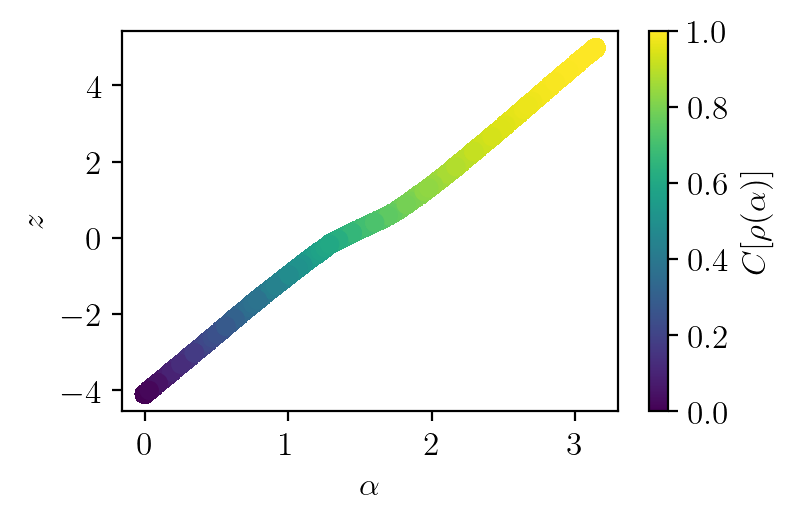

In [13]:
plot_scatter(y_test_noiseless,z_mean_noiseless[:,0],concurrence_noiseless_arr,"$\\alpha$","$z$","$C[\\rho(\\alpha)]$",1)

In [14]:


def discord(rho):
    op = [sx,sy,sz]
    x = [qt.expect(qt.tensor(o,s0),rho) for o in op]
    y = [qt.expect(qt.tensor(s0,o),rho) for o in op]
    t = [ qt.expect(qt.tensor(o0,o1),rho) for o0 in op for o1 in op]
    
    x = np.matrix(x).reshape(-1,1)
    y = np.matrix(y).reshape(-1,1)
    t = np.matrix(t).reshape((3,3))
    
    return 0.25*(np.trace(np.dot(x.transpose(),x)) + np.trace(np.dot(t.transpose(),t))
                 - np.max(np.linalg.eigh(np.dot(x,x.transpose()) + np.dot(t,t.transpose()))[0]))

def rescaled_discord(rho):
    D = discord(rho)
    purity = np.trace(rho*rho)
    return 1/2*(1-np.sqrt(1-D/2/purity))/(1-np.sqrt(3)/2)

print(discord(qt.Qobj(rho_arr_noiseless[0].reshape(4,4),dims=[[2,2],[2,2]])))

discord_noiseless_arr = np.array([discord(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in rho_arr_noiseless[::50]])
plt.plot(alpha_arr[::50],discord_noiseless_arr)
plt.xlabel("$\\alpha$")
plt.ylabel("$D$")

NameError: name 'sx' is not defined

In [ ]:
discord_gamma_arr = np.array([rescaled_discord(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in rho_gamma])
plt.plot(gamma,discord_gamma_arr)
plt.xlabel("$\\gamma$")
plt.ylabel("$D$")



In [9]:
# n_angle = 101
# n_samples = 1000
# rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
# scan_arr = np.linspace(0, np.pi, n_angle)

# alpha_arr = np.zeros(len(rho_arr))
# cnt = 0
# for theta in scan_arr:
#         for _ in (range(n_samples)):
#             alpha_arr[cnt] = theta
#             cnt += 1


# X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
# concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

In [15]:
# batch_size = 64
# beta = 0.0
# learning_rate = 0.005
# lat_dim = 1
# hidden_act = "tanh"
# final_act = "linear"

In [14]:
# encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

# encoder.load_weights("encoder_noise_0beta.h5")
# decoder.load_weights("decoder_noise_0beta.h5")

# vae = VAE(encoder, decoder, beta)
# vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
# vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

# z_mean, z_log_var, z = vae.encoder.predict(X_test)

In [13]:
# plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\alpha$","Latent Parameter $Z_0$","Concurrence",1)

# Noisy Dataset  $0.75\beta$

Load Dataset

In [15]:
rho_arr_noisy = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(rho_arr_noisy, alpha_arr, random_state=42)
concurrence_noisy_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test_noisy])

Load trained VAE and define Hyperparameters:

In [16]:
batch_size = 64
beta = 0.75
learning_rate = 0.0001
lat_dim = 1
hidden_act = "tanh"
final_act = "linear"

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)
encoder.load_weights("encoder_noise_075beta.h5")
decoder.load_weights("decoder_noise_075beta.h5")

vae_noisy = VAE(encoder, decoder, beta)
vae_noisy.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_noisy.fit(X_test_noisy, epochs=1, batch_size=64, verbose=1) 

z_mean_noisy, z_log_var_noisy, z_noisy = vae_noisy.encoder.predict(X_test_noisy)

790/790 [==============================] - 1s 585us/step


Investigate Latent Space

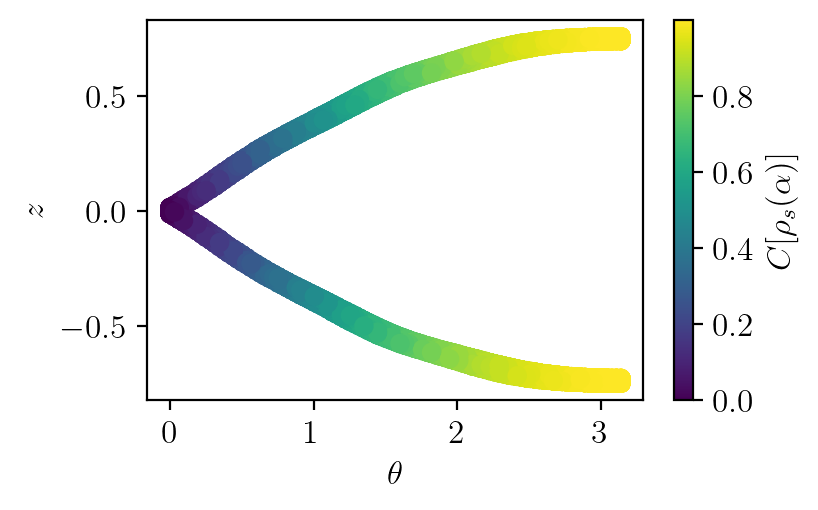

In [17]:
plot_scatter(y_test_noisy,z_mean_noisy[:,0],concurrence_noisy_arr,"$\\theta$","$z$","$C[\\rho_s(\\alpha)]$",1)

# 3D Latent Space

790/790 [==============================] - 1s 613us/step


/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_11272/2164464994.py:45: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


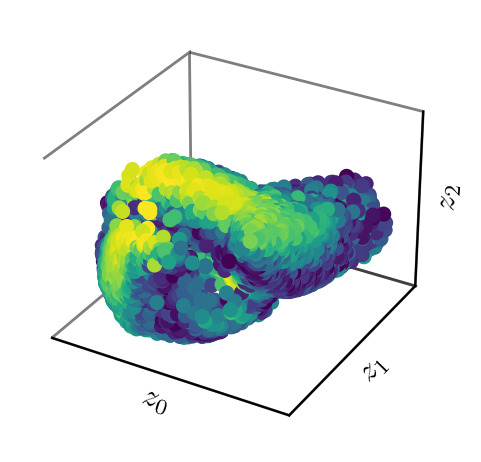

In [18]:
batch_size = 64
beta = 0.0
learning_rate = 0.0001
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_00beta_ramp.h5")

vae_3d = VAE(encoder, decoder, beta)
vae_3d.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_3d.fit(X_test_noisy, epochs=1, batch_size=64, verbose=1) 

z_mean_3d, _, _ = vae_3d.encoder.predict(X_test_noisy)

tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean_3d[:5000])


fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(projection='3d')

ax.scatter(z_mean_3d[:,0], z_mean_3d[:,2],z_mean_3d[:,1], c=concurrence_noisy_arr, alpha=1)

ax.set_xlabel("$z_0$",labelpad=-15)
ax.set_ylabel("$z_1$",labelpad=-15,)
ax.set_zlabel("$z_2$",labelpad=-15)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
                
plt.tight_layout()

# Figures 

In [19]:
read_dictionary = np.load('no_0beta_latent/history_{}_1_{}.npy'.format(5,3),allow_pickle='TRUE').item()
read_dictionary["reconstruction_loss"][-1]
#         'no_0beta_latent/history_5_1_3.npy'

1.5157855159486644e-05

In [20]:
read_dictionary = np.load('/home/felix/Downloads/new_test/history_test_5_new_3.npy',allow_pickle='TRUE').item()
read_dictionary["reconstruction_loss"][-1]
        

1.5157855159486644e-05

In [21]:
lat_arr = np.arange(1,9)
n_exp = 9

recon_loss_noiseless = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise_075 = np.zeros((len(lat_arr),n_exp, 1))


for cnt_1, inx in enumerate(lat_arr):
    for cnt_2 in range(n_exp):
        read_dictionary = np.load('no_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noiseless[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_075beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise_075[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]

av_recon_loss_arr_noiseless = np.average(recon_loss_noiseless,axis=1)
std_recon_loss_arr_noiseless = np.std(recon_loss_noiseless,axis=1)

av_recon_loss_arr_noise = np.average(recon_loss_noise,axis=1)
std_recon_loss_arr_noise = np.std(recon_loss_noise,axis=1)

av_recon_loss_arr_noise_075 = np.average(recon_loss_noise_075,axis=1)
std_recon_loss_arr_noise_075 = np.std(recon_loss_noise_075,axis=1)

In [22]:
from scipy.stats import linregress


In [23]:

selected_alpha_noiseless, selected_conc_noiseless, selected_z_noiseless, pred_conc_noiseless, pred_alpha_noiseless, fitobj_conc_noiseless, fitobj_alpha_noiseless = gen_plot_data(rho_arr_noiseless, vae_noiseless, scan_arr)  
selected_alpha_noisy, selected_conc_noisy, selected_z_noisy, pred_conc_noisy, pred_alpha_noisy, fitobj_conc_noisy, fitobj_alpha_noisy = gen_plot_data(rho_arr_noisy, vae_noisy, scan_arr)  
selected_alpha_generalized, selected_conc_generalized, selected_z_generalized, pred_conc_generalized, pred_alpha_generalized, fitobj_conc_generalized, fitobj_alpha_generalized = gen_plot_data(rho_arr_noiseless, vae_noisy, scan_arr)      

# selected_alpha_noiseless, selected_conc_noiseless, selected_z_noiseless, pred_conc_noiseless, pred_alpha_noiseless = gen_plot_data(rho_arr_noiseless, vae_noiseless,scan_arr)  
# selected_alpha_noisy, selected_conc_noisy, selected_z_noisy, pred_conc_noisy, pred_alpha_noisy = gen_plot_data(rho_arr_noisy, vae_test,scan_arr)  
# selected_alpha_generalized, selected_conc_generalized, selected_z_generalized, pred_conc_generalized, pred_alpha_generalized = gen_plot_data(rho_arr_noiseless, vae_test,scan_arr)      

7/7 [==============================] - 0s 1ms/step


In [24]:
def add_subplot_axes(ax,rect,facecolor='w'): # matplotlib 2.0+
# def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],facecolor=facecolor)  # matplotlib 2.0+
#     subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    
    yy_labelsize = subax.get_yticklabels()      #get_xticklabels()[0].get_size()
    
    
    subax.yaxis.offsetText.set_fontsize(y_labelsize)
    
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    print(y_labelsize)
    return subax

In [34]:
0.5/(0.4/0.15)

0.18749999999999997

5.196152422706632


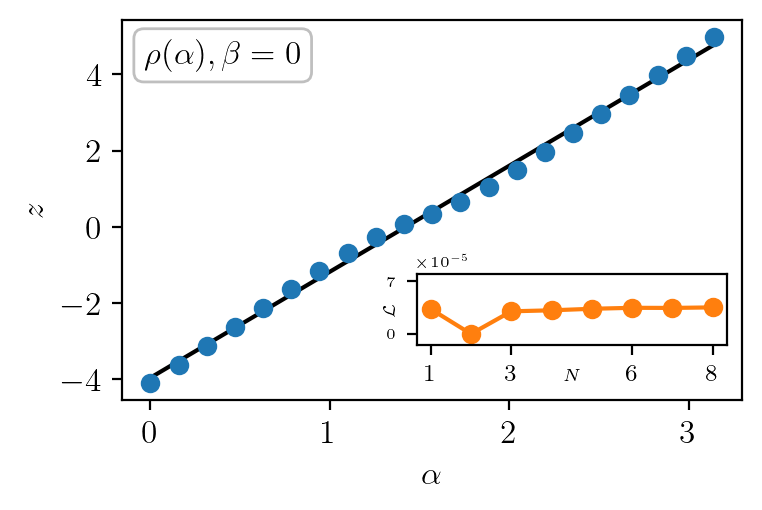

In [43]:
fig, ax = plt.subplots()

ax.errorbar(selected_alpha_noiseless[:,0],np.mean(selected_z_noiseless,axis=1),np.std(selected_z_noiseless,axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho(\\alpha)\ \\beta=0.00$")
ax.plot(selected_alpha_noiseless[:,0], np.mean(linear_fit(selected_alpha_noiseless.flatten(), selected_z_noiseless.flatten())[0] ,axis=1),c="black")

# rect = [0.575,0.125,0.4,0.15]

(0.4/0.15)

rect = [0.475,0.145,0.5,0.5/(0.4/0.15)]
ax1 = add_subplot_axes(ax,rect)

ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$z$")


ax1.errorbar(lat_arr, av_recon_loss_arr_noiseless.flatten(),std_recon_loss_arr_noiseless.flatten(),ls='-',marker="o",capsize=0, capthick=1, ecolor='black',color="C1")

ax1.set_xlabel("$N$",labelpad=-6)
ax1.set_ylabel("$\\mathcal{L}$",labelpad=-4)
ax1.xaxis.label.set_fontsize(1.3*4.6475800154489)
ax1.yaxis.label.set_fontsize(1.3*4.6475800154489)
# ax.annotate("a",xy=(0.012, 0.77), xycoords='axes fraction')
# ax1.annotate("b",xy=(0.012, 0.67), xycoords='axes fraction')

ax1.set_ylim(-0.000015,0.00008)
ax1.set_yticks([0.00000,0.00007])
ax1.set_xticks([1,3,6,8])
# fig.legend( bbox_to_anchor=(0.55,0.9))
# ax1.text(0,0.0004,"$\\rho(\\alpha)\ \\beta=0.00$")
textstr = "$\\rho(\\alpha), \\beta=0$"
props = dict(boxstyle='round', facecolor='white', alpha=0.25)
ax.text(0.035, 0.95, textstr, transform=ax.transAxes, 
        verticalalignment='top', bbox=props)
plt.savefig("/home/felix/Downloads/fig_exp1_new.pdf",bbox_inches="tight",pad_inches=0.1)

5.196152422706632


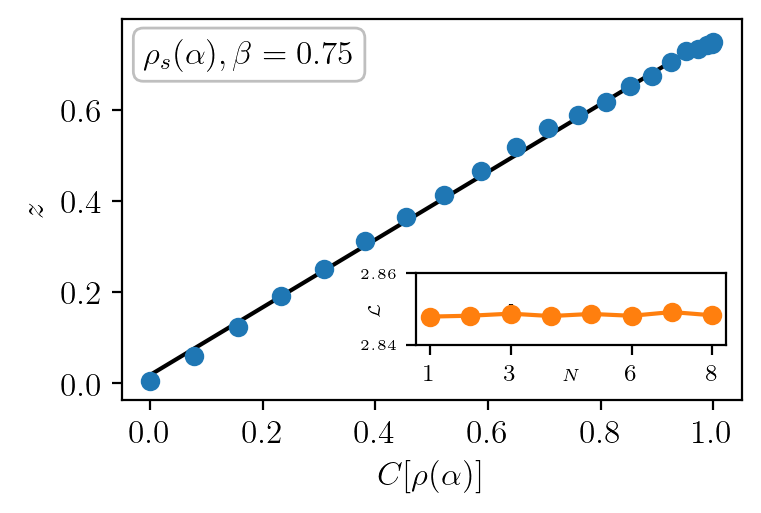

In [46]:
fig, ax = plt.subplots()

ax.errorbar(selected_conc_noisy[:,0],np.mean(np.abs(selected_z_noisy),axis=1),np.std(np.abs(selected_z_noisy),axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax.plot(selected_conc_noisy[:,0], np.mean(linear_fit(selected_conc_noisy.flatten(), np.abs(selected_z_noisy).flatten())[0] ,axis=1),c="black")

rect = [0.475,0.145,0.5,0.5/(0.4/0.15)]
ax1 = add_subplot_axes(ax,rect)

ax.set_xlabel("$C[\\rho(\\alpha)]$")
ax.set_ylabel("$z$")


ax1.errorbar(lat_arr, av_recon_loss_arr_noise_075.flatten(),std_recon_loss_arr_noise_075.flatten(),ls='-',marker="o",capsize=0, capthick=1, ecolor='black',color="C1")

ax1.set_xlabel("$N$",labelpad=-6)
ax1.set_ylabel("$\\mathcal{L}$",labelpad=-8)
ax1.xaxis.label.set_fontsize(1.3*4.6475800154489)
ax1.yaxis.label.set_fontsize(1.3*4.6475800154489)

ax1.set_xticks([1,3,6,8])

# fig.legend( bbox_to_anchor=(0.575,0.9))

ax1.set_ylabel("$\\mathcal{L}$")
ax1.set_xlabel("$N$")
ax1.set_yticks([2.84,2.86])
ax1.set_xticks([1,3,6,8])

textstr = "$\\rho_s(\\alpha), \\beta=0.75$"
props = dict(boxstyle='round', facecolor='white', alpha=0.25)
ax.text(0.035, 0.95, textstr, transform=ax.transAxes, 
        verticalalignment='top', bbox=props)
plt.savefig("/home/felix/Downloads/fig_exp4_new.pdf",bbox_inches="tight",pad_inches=0.1)

3.6791303320214137


Text(-16, 0.95, '$\\rho_s(\\alpha), \\beta=0$')

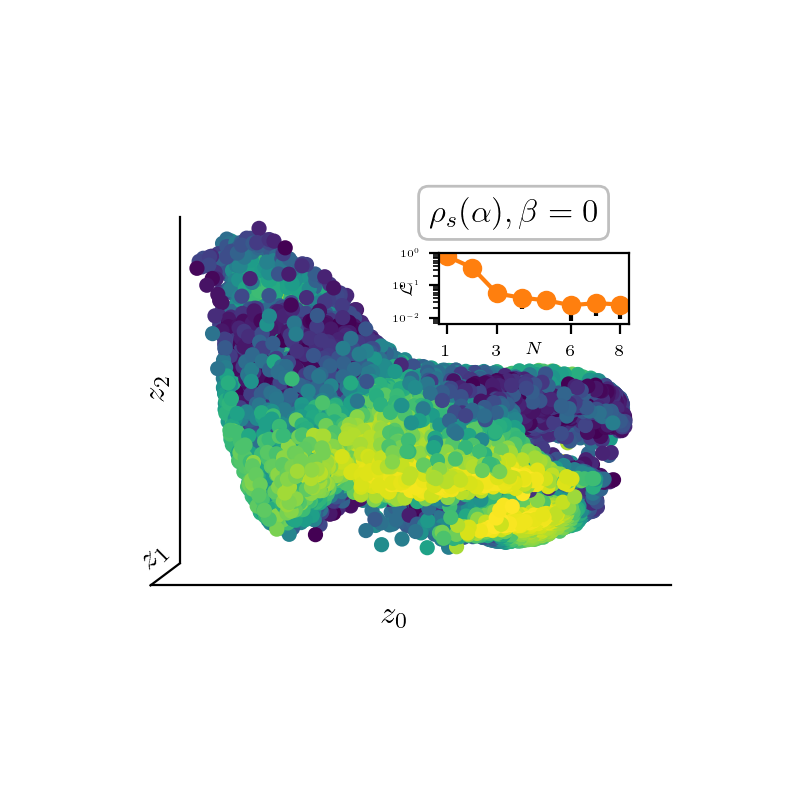

In [50]:
fig = plt.figure(figsize=(2*fig_size_dim, 2*fig_size_dim/golden_ratio))
ax = fig.add_subplot(projection='3d') 
ax.scatter(z_mean_3d[:,0], z_mean_3d[:,1],z_mean_3d[:,2],alpha=1, c=concurrence_noisy_arr,clip_on=False)


# ax.scatter(z_mean_3d[:,2], z_mean_3d[:,1],z_mean_3d[:,0],alpha=1, c=concurrence_noisy_arr,clip_on=False)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
ax.view_init(0, 90)
fig.text(0.5, 0.27,"$z_0$")
fig.text(0.345, 0.325,"$z_1$",rotation=45)
fig.text(0.35, 0.5,"$z_2$",rotation=90)

rect = [0.55,0.6,0.25,0.094]
ax1 = add_subplot_axes(ax,rect)
ax1.errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='-',marker="o",capsize=0, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$",color="C1")

ax1.set_xlabel("$N$",labelpad=-6)
ax1.set_ylabel("$\\mathcal{L}$",labelpad=-8)
# ax1.set_yticks([0,0.75])
# ax1.set_ylim(-0.2,1)
ax1.set_xticks([1,3,6,8])
ax1.xaxis.label.set_fontsize(1.3*4.6475800154489)
ax1.yaxis.label.set_fontsize(1.3*4.6475800154489)
ax1.set_yscale("log")

textstr = "$\\rho_s(\\alpha), \\beta=0$"
props = dict(boxstyle='round', facecolor='white', alpha=0.25)
ax.text(-16, 0.95,37, textstr, transform=ax.transAxes, 
        verticalalignment='top', bbox=props)

# plt.savefig("/home/felix/Downloads/fig_exp2_new.pdf",bbox_inches="tight",pad_inches=0.1)


In [434]:
# spec = gridspec.GridSpec(ncols=1, nrows=2,
#                          hspace=0.6, height_ratios=[1,4])
# fig = plt.figure(constrained_layout=True,figsize=(fig_size_dim, 1*fig_size_dim/golden_ratio))
# # fig = plt.figure(figsize=(fig_size_dim, 1*fig_size_dim/golden_ratio))


# # ax = fig.add_subplot(spec[0])
# # ax.errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$")

# # ax.set_xlabel("$N$")
# # ax.set_ylabel("$\\mathcal{L}$")
# # ax.set_yticks([0,0.75])
# # ax.set_ylim(-0.2,1)

# ax2 = fig.add_subplot(spec[1],projection='3d',) 

# ax2.get_proj = lambda: np.dot(Axes3D.get_proj(ax2), np.diag([4.15, 1, 1, 1]))

# ax2.scatter(z_mean_3d[:,0], z_mean_3d[:,1],z_mean_3d[:,2], c=concurrence_noisy_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,2], z_mean_3d[:,1],z_mean_3d[:,0], c=concurrence_arr, alpha=1,clip_on=False) # 
# # ax2.scatter(z_mean_3d[:,0], z_mean_3d[:,2],z_mean_3d[:,1], c=concurrence_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,1], z_mean_3d[:,2],z_mean_3d[:,0], c=concurrence_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,1], z_mean_3d[:,0],z_mean_3d[:,2], c=concurrence_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,2], z_mean_3d[:,0],z_mean_3d[:,1], c=concurrence_arr, alpha=1,clip_on=False)


# fig.text(0.5, 0.1,"$z_0$")
# fig.text(0.075, 0.26,"$z_1$",rotation=15)
# fig.text(0.07, 0.35,"$z_2$",rotation=90)

# ax2.grid(False)
# ax2.xaxis.pane.set_edgecolor('white')
# ax2.yaxis.pane.set_edgecolor('white')
# ax2.zaxis.pane.set_edgecolor('white')

# ax2.xaxis.pane.fill = False
# ax2.yaxis.pane.fill = False
# ax2.zaxis.pane.fill = False

# ax2.xaxis.set_ticks([])
# ax2.yaxis.set_ticks([])
# ax2.zaxis.set_ticks([])
                   
# fig.text(0.13, 0.773, "a")
# fig.text(0.13, 0.26, "b")

# ax2.view_init(0, 90)
# # ax2.set_position(Bbox([[0.3660734857423326, 0.10999999999999999], [0.6589265142576675, 0.5838461538461539]]))
# ax2.set_position(Bbox([[0.3660734857423326-0.04, 0.10999999999999999], [0.6589265142576675-0.04, 0.5838461538461539]]))
# ax.set_xticks([1,3,6,8])

# # ax2.dist = 20
# # plt.subplots_adjust(wspace=5)

# # ax2.set_position([1,1,1,0])

# # plt.tight_layout()
# # plt.savefig("/home/felix/Downloads/fig5_3dlat.pdf")#,bbox_inches="tight",pad_inches=0.1)
# # plt.tight_layout()

# # plt.savefig("/home/felix/Downloads/fig_exp2.pdf",bbox_inches="tight",pad_inches=0.1)

In [378]:
# fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

# ax[0].errorbar(lat_arr, av_recon_loss_arr_noiseless.flatten(),std_recon_loss_arr_noiseless.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho(\\alpha)\ \  \\beta=0.00$")

# ax[1].errorbar(selected_alpha_noiseless[:,0],np.mean(selected_z_noiseless,axis=1),np.std(selected_z_noiseless,axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
#               label="$\\rho(\\alpha)\ \\beta=0.00$")
# ax22 = ax[1].twinx()
# ax22.errorbar(selected_alpha_noiseless[:,0],np.mean(pred_alpha_noiseless,axis=1),np.std(pred_alpha_noiseless,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="C1",
#              )

# ax[0].set_xlabel("$N$")
# ax[1].set_xlabel("$\\alpha$")


# ax[0].set_ylabel("$\\mathcal{L}$")
# ax[1].set_ylabel("$z$")
# ax22.set_ylabel("$L(z)$")


# ax[0].annotate("a",xy=(0.012, 0.77), xycoords='axes fraction')
# ax[1].annotate("b",xy=(0.012, 0.67), xycoords='axes fraction')


# ax[0].set_ylim(-0.000015,0.00008)
# ax[0].set_yticks([0.00000,0.00007])

# ax[1].set_yticks([-4,5])
# ax22.set_yticks([0,3])
# ax[0].set_xticks([1,3,6,8])

# plt.tight_layout()

# # plt.savefig("/home/felix/Downloads/fig_exp1.pdf",bbox_inches="tight",pad_inches=0.1)

In [87]:
slope, intercept, r_value, p_value, std_err = linregress(selected_alpha_noiseless[:,0],np.mean(selected_z_noiseless,axis=1))
r_value**2

0.9968148929862355

In [433]:
# fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

# ax[0].errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$")

# ax[0].set_xlabel("$N$")
# ax[0].set_ylabel("$\\mathcal{L}$")
# ax[0].set_yticks([0,0.75])
# ax[0].set_ylim(-0.2,1)
# ax[0].set_xticks([1,3,6,8])

# ax[1].set_yticks([])
# ax[1].set_xticks([])


# ax[1].set_xlabel("$\\widetilde{z_0}$")
# ax[1].set_ylabel("$\\widetilde{z_1}$")


# ax[1].scatter(X_embedded[:,0], X_embedded[:,1] ,c=concurrence_noisy_arr[:5000])
# ax[0].annotate("a",xy=(0.012, 0.075), xycoords='axes fraction')
# ax[1].annotate("b",xy=(0.012, 0.75), xycoords='axes fraction')

# plt.tight_layout()

# # plt.savefig("/home/felix/Downloads/fig_exp2.pdf",bbox_inches="tight",pad_inches=0.1)

In [431]:
# spec = gridspec.GridSpec(ncols=1, nrows=2,
#                          hspace=0.6, height_ratios=[1,4])
# fig = plt.figure(constrained_layout=True,figsize=(fig_size_dim, 1*fig_size_dim/golden_ratio))
# # fig = plt.figure(figsize=(fig_size_dim, 1*fig_size_dim/golden_ratio))


# ax = fig.add_subplot(spec[0])
# ax.errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$")

# ax.set_xlabel("$N$")
# ax.set_ylabel("$\\mathcal{L}$")
# ax.set_yticks([0,0.75])
# ax.set_ylim(-0.2,1)

# ax2 = fig.add_subplot(spec[1],projection='3d',) 

# ax2.get_proj = lambda: np.dot(Axes3D.get_proj(ax2), np.diag([4.15, 1, 1, 1]))

# ax2.scatter(z_mean_3d[:,0], z_mean_3d[:,1],z_mean_3d[:,2], c=concurrence_noisy_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,2], z_mean_3d[:,1],z_mean_3d[:,0], c=concurrence_arr, alpha=1,clip_on=False) # 
# # ax2.scatter(z_mean_3d[:,0], z_mean_3d[:,2],z_mean_3d[:,1], c=concurrence_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,1], z_mean_3d[:,2],z_mean_3d[:,0], c=concurrence_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,1], z_mean_3d[:,0],z_mean_3d[:,2], c=concurrence_arr, alpha=1,clip_on=False)
# # ax2.scatter(z_mean_3d[:,2], z_mean_3d[:,0],z_mean_3d[:,1], c=concurrence_arr, alpha=1,clip_on=False)


# fig.text(0.5, 0.1,"$z_0$")
# fig.text(0.075, 0.26,"$z_1$",rotation=15)
# fig.text(0.07, 0.35,"$z_2$",rotation=90)

# ax2.grid(False)
# ax2.xaxis.pane.set_edgecolor('white')
# ax2.yaxis.pane.set_edgecolor('white')
# ax2.zaxis.pane.set_edgecolor('white')

# ax2.xaxis.pane.fill = False
# ax2.yaxis.pane.fill = False
# ax2.zaxis.pane.fill = False

# ax2.xaxis.set_ticks([])
# ax2.yaxis.set_ticks([])
# ax2.zaxis.set_ticks([])
                   
# fig.text(0.13, 0.773, "a")
# fig.text(0.13, 0.26, "b")

# ax2.view_init(0, 90)
# # ax2.set_position(Bbox([[0.3660734857423326, 0.10999999999999999], [0.6589265142576675, 0.5838461538461539]]))
# ax2.set_position(Bbox([[0.3660734857423326-0.04, 0.10999999999999999], [0.6589265142576675-0.04, 0.5838461538461539]]))
# ax.set_xticks([1,3,6,8])

# # ax2.dist = 20
# # plt.subplots_adjust(wspace=5)

# # ax2.set_position([1,1,1,0])

# # plt.tight_layout()
# # plt.savefig("/home/felix/Downloads/fig5_3dlat.pdf")#,bbox_inches="tight",pad_inches=0.1)
# # plt.tight_layout()

# # plt.savefig("/home/felix/Downloads/fig_exp2.pdf",bbox_inches="tight",pad_inches=0.1)

In [432]:
# fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

# ax[0].errorbar(lat_arr, av_recon_loss_arr_noise_075.flatten(),std_recon_loss_arr_noise_075.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\ \\beta=0.75$",
#                color="C0")

# ax[1].errorbar(selected_conc_noisy[:,0],np.mean(np.concatenate((np.abs(selected_z_noisy),np.abs(selected_z_generalized)),axis=1),axis=1),
#              np.std(np.concatenate((np.abs(selected_z_noisy),np.abs(selected_z_generalized)),axis=1),axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
#               label="$\\rho_s(\\alpha)\ \\beta=0.75$")
# ax22 = ax[1].twinx()
# ax22.errorbar(selected_conc_noisy[:,0],np.mean(np.concatenate((np.abs(pred_conc_noisy),np.abs(pred_conc_generalized)),axis=1),axis=1),
#              np.std(np.concatenate((np.abs(pred_conc_noisy),np.abs(pred_conc_generalized)),axis=1),axis=1),ls='',ms=2.5,marker="o",capsize=5, capthick=1, ecolor='black',color="C1",
#              )

# ax[0].set_xlabel("$N$")
# ax[1].set_xlabel("$C[\\rho(\\alpha)]$")


# ax[0].set_ylabel("$\\mathcal{L}$")
# ax[1].set_ylabel("$z$")
# ax22.set_ylabel("$L(z)$")

# ax[0].annotate("a",xy=(0.012, 0.78), xycoords='axes fraction')
# ax[1].annotate("b",xy=(0.012, 0.68), xycoords='axes fraction')

# ax[0].set_yticks([2.84,2.86])
# ax[0].set_xticks([1,3,6,8])

# ax[1].set_yticks([0,0.75])
# plt.tight_layout()

# # plt.savefig("/home/felix/Downloads/fig_exp4.pdf",bbox_inches="tight",pad_inches=0.1)

In [80]:
slope, intercept, r_value, p_value, std_err = linregress(selected_conc_noisy[:,0],np.mean(np.concatenate((np.abs(pred_conc_noisy),np.abs(pred_conc_generalized)),axis=1),axis=1))
r_value**2

0.9984104190730042

# Generalization

In [222]:
def get_dm():
    state = Statevector.from_int(0, 2**2)
#     state = state.evolve(three_qubit_circuit(theta1, theta2))
    return DensityMatrix(state)

def get_random_u(n):
    z = np.random.randn(n,n)/np.sqrt(2.0)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    return q

def apply_u(dm, U):
    return  U * dm * U.dag() 

from qiskit.quantum_info import Statevector, DensityMatrix,concurrence

def gen_data_rand():
    cnt = 0 
    data_arr = np.zeros((210,16))
    conc_arr = np.zeros((210))
    
    for c_arr in selected_conc_noisy:
        for c in c_arr:
            Found = False
            while not Found:
                trial_state = apply_u(qt.Qobj(get_dm().data,dims=[[2,2],[2,2]]), qt.Qobj(get_random_u(4),dims=[[2,2],[2,2]]))
                if np.abs(np.array(trial_state).imag).sum() == 0 and np.isclose(qt.concurrence(trial_state),c,atol=2e-2):
                    data_arr[cnt] = np.array(trial_state).real.flatten()
                    conc_arr[cnt] = qt.concurrence(trial_state)
                    
                    cnt += 1 
                    Found = True
                    print(cnt)
            
    return data_arr, conc_arr

rand_data_arr, rand_conc_arr = gen_data_rand()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210


In [224]:
random_unitary_arr = rand_data_arr
z_mean_ru, _, _ = vae_noisy.encoder.predict(random_unitary_arr)
concur_arr_ru = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in random_unitary_arr])
pred_conc_ru = linear_fit(np.abs(z_mean_ru[:,0]),concur_arr_ru)[0]
z_mean_ru = np.reshape(z_mean_ru,(21,10))    
concur_arr_ru = np.reshape(concur_arr_ru,(21,10))
pred_conc_ru = np.reshape(pred_conc_ru,(21,10))

7/7 [==============================] - 0s 841us/step


4 panel 
qs but unscram
rand unit 
rand circ 
depol

In [235]:
np.mean(concur_arr_ru,axis=1),np.mean(np.abs(z_mean_ru),axis=1)

((21,), (21,))

Text(0, 0.5, '$z$')

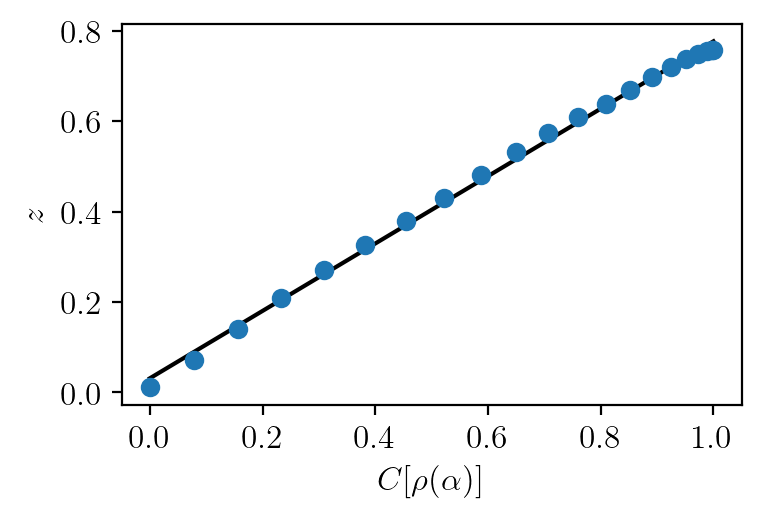

In [262]:
# Noiseless tested with noisy
fig, ax = plt.subplots()
ax.errorbar(selected_conc_generalized[:,0],np.mean(np.abs(selected_z_generalized),axis=1),np.std(np.abs(selected_z_generalized),axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax.plot(selected_conc_generalized[:,0], np.mean(linear_fit(selected_conc_generalized.flatten(), np.abs(selected_z_generalized).flatten())[0] ,axis=1),c="black")


ax.set_xlabel("$C[\\rho(\\alpha)]$")
ax.set_ylabel("$z$")

Text(0, 0.5, '$z$')

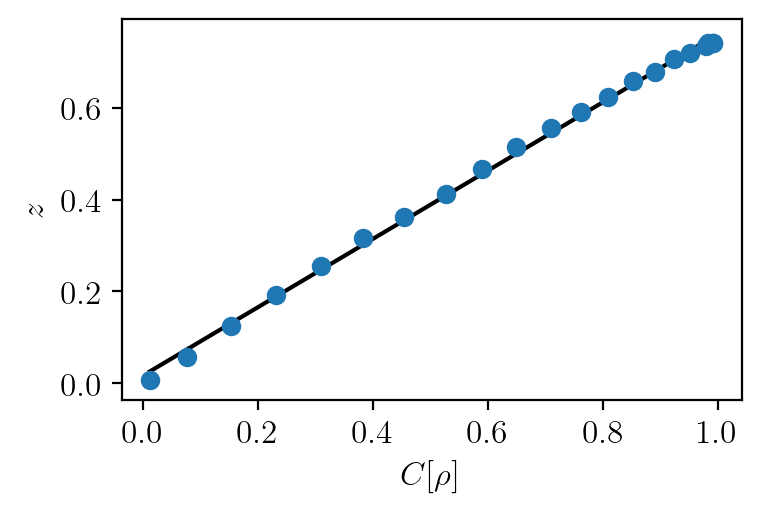

In [239]:
# 4x4 random unitary
fig,ax = plt.subplots()
ax.errorbar(np.mean(concur_arr_ru,axis=1),np.mean(np.abs(z_mean_ru),axis=1),np.std(np.abs(z_mean_ru),axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax.plot(np.mean(concur_arr_ru,axis=1), np.mean(linear_fit( concur_arr_ru.flatten(),np.abs(z_mean_ru).flatten())[0] ,axis=1),c="black")


ax.set_xlabel("$C[\\rho]$")
ax.set_ylabel("$z$")

Text(0, 0.5, '$z$')

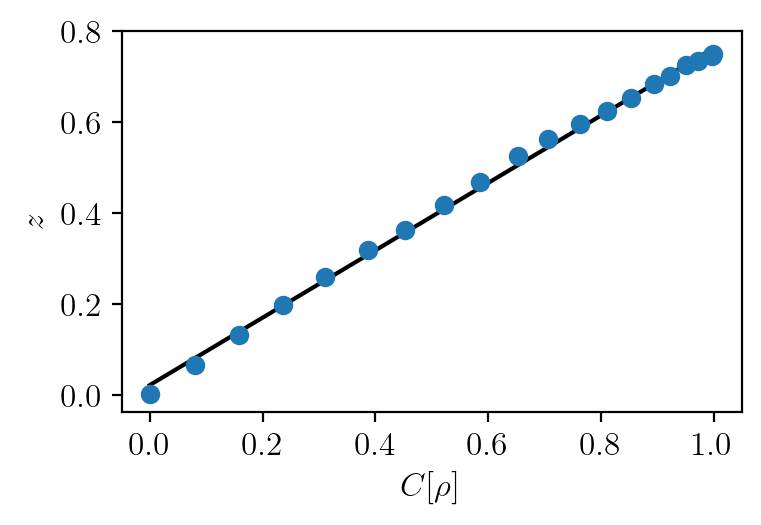

In [243]:
# random circuit 
fig,ax = plt.subplots()
ax.errorbar(np.mean(concur_arr_rc,axis=1),np.mean(np.abs(z_mean_rc),axis=1),np.std(np.abs(z_mean_rc),axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax.plot(np.mean(concur_arr_rc,axis=1), np.mean(linear_fit(concur_arr_rc.flatten(),np.abs(z_mean_rc).flatten())[0] ,axis=1),c="black")


ax.set_xlabel("$C[\\rho]$")
ax.set_ylabel("$z$")

Text(0, 0.5, '$z$')

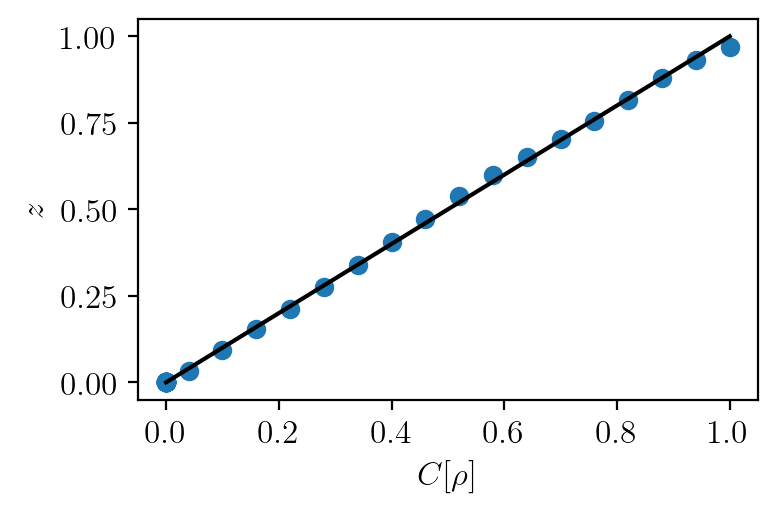

In [291]:
# gamma
fig,ax = plt.subplots()

ax.errorbar(np.mean(conc_gamma_arr_10,axis=1)[::3],np.maximum(np.mean(y_gamma,axis=1)[::3],0),np.maximum(np.std(y_gamma,axis=1)[::3],0),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_d(\\alpha)$",zorder=-1)

ax.plot(np.mean(conc_gamma_arr_10,axis=1), np.mean(linear_fit(conc_gamma_arr_10.flatten(),np.maximum(y_gamma[::1],0).flatten())[0] ,axis=1),c="black")


ax.set_xlabel("$C[\\rho]$")
ax.set_ylabel("$z$")

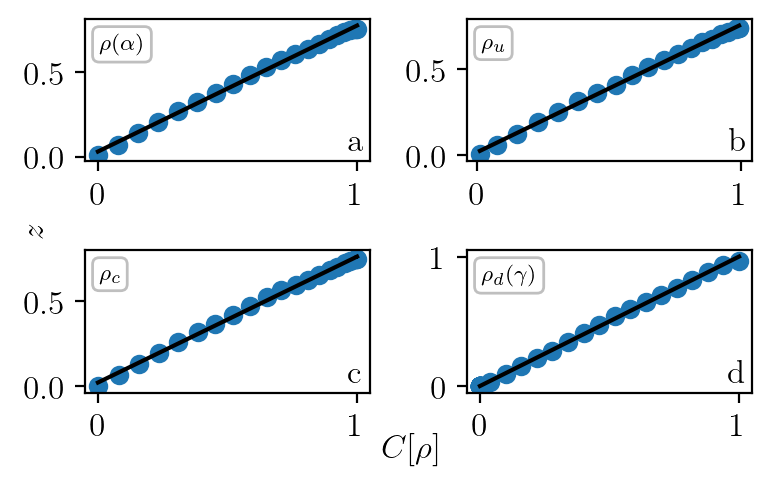

In [449]:
fig,ax = plt.subplots(2,2)

ax[0,0].errorbar(selected_conc_generalized[:,0],np.mean(np.abs(selected_z_generalized),axis=1),np.std(np.abs(selected_z_generalized),axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s$",zorder=-1)
ax[0,0].plot(selected_conc_generalized[:,0], np.mean(linear_fit(selected_conc_generalized.flatten(), np.abs(selected_z_generalized).flatten())[0] ,axis=1),c="black")

ax[0,1].errorbar(np.mean(concur_arr_ru,axis=1),np.mean(np.abs(z_mean_ru),axis=1),np.std(np.abs(z_mean_ru),axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s$",zorder=-1)
ax[0,1].plot(np.mean(concur_arr_ru,axis=1), np.mean(linear_fit( concur_arr_ru.flatten(),np.abs(z_mean_ru).flatten())[0] ,axis=1),c="black")

ax[1,0].errorbar(np.mean(concur_arr_rc,axis=1),np.mean(np.abs(z_mean_rc),axis=1),np.std(np.abs(z_mean_rc),axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s$",zorder=-1)
ax[1,0].plot(np.mean(concur_arr_rc,axis=1), np.mean(linear_fit(concur_arr_rc.flatten(),np.abs(z_mean_rc).flatten())[0] ,axis=1),c="black")

ax[1,1].errorbar(np.mean(conc_gamma_arr_10,axis=1)[::3],np.maximum(np.mean(y_gamma,axis=1)[::3],0),np.maximum(np.std(y_gamma,axis=1)[::3],0),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_d$",zorder=-1)
ax[1,1].plot(np.mean(conc_gamma_arr_10,axis=1), np.mean(linear_fit(conc_gamma_arr_10.flatten(),np.maximum(y_gamma[::1],0).flatten())[0] ,axis=1),c="black")


fig.text(0.53, 0.04, "$C[\\rho]$", ha='center')
fig.text(0.04, 0.5, "$z$", va='center', rotation='vertical')

fig.text(0.45, 0.68, "a", va='center')
fig.text(0.925, 0.68, "b", va='center')
fig.text(0.45, 0.21, "c", va='center')
fig.text(0.925, 0.21, "d", va='center')

textstr = "$\\rho(\\alpha)$"
props = dict(boxstyle='round', facecolor='white', alpha=0.25)
ax[0,0].text(0.05, 0.9, textstr, transform=ax[0,0].transAxes, 
        verticalalignment='top', bbox=props,fontsize=8)

textstr = "$\\rho_u$"
props = dict(boxstyle='round', facecolor='white', alpha=0.25)
ax[0,1].text(0.05, 0.9, textstr, transform=ax[0,1].transAxes, 
        verticalalignment='top', bbox=props,fontsize=8)

textstr = "$\\rho_c$"
props = dict(boxstyle='round', facecolor='white', alpha=0.25)
ax[1,0].text(0.05, 0.9, textstr, transform=ax[1,0].transAxes, 
        verticalalignment='top', bbox=props,fontsize=8)

textstr = "$\\rho_d(\\gamma)$"
props = dict(boxstyle='round', facecolor='white', alpha=0.25)
ax[1,1].text(0.05, 0.9, textstr, transform=ax[1,1].transAxes, 
        verticalalignment='top', bbox=props,fontsize=8)




plt.tight_layout()

plt.savefig("/home/felix/Downloads/fig_exp5_new.pdf",bbox_inches="tight",pad_inches=0.1)

In [242]:
random_circ_arr = np.load("/home/felix/PycharmProjects/qcvae/random_circ_arr.npy")
z_mean_rc, _, _ = vae_noisy.encoder.predict(random_circ_arr)
concur_arr_rc = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in random_circ_arr])
pred_conc_rc = linear_fit(np.abs(z_mean_rc[:,0]),concur_arr_rc)[0]
z_mean_rc = np.reshape(z_mean_rc,(21,10))    
concur_arr_rc = np.reshape(concur_arr_rc,(21,10))
pred_conc_rc = np.reshape(pred_conc_rc,(21,10))

7/7 [==============================] - 0s 943us/step


In [260]:
gamma = np.load('/home/felix/Downloads/gamma_new.npy', mmap_mode="r")
rho_gamma = np.load('/home/felix/Downloads/rho_gamma_noiseless.npy', mmap_mode="r")
conc_gamma_arr = np.array([qt.concurrence(qt.Qobj(np.reshape(dm,(4,4)),dims=[[2,2],[2,2]])) for dm in rho_gamma])

gamma_10 = np.repeat(gamma,10)
rho_gamma_10 = np.repeat(rho_gamma,10,axis=0)
conc_gamma_arr_10 = np.repeat(conc_gamma_arr,10)

z_mean_gamma, _, _ = vae_noisy.encoder.predict(rho_gamma)
z_mean_gamma_10, _, _ = vae_noisy.encoder.predict(rho_gamma_10)

gamma_10 = np.reshape(gamma_10,(101,10))
z_mean_gamma_10 = np.reshape(z_mean_gamma_10,(101,10))
conc_gamma_arr_10 = np.reshape(conc_gamma_arr_10,(101,10))


32/32 [==============================] - 0s 755us/step


In [258]:
def linear_fit(x, y):
    arr_len = int(len(x)/10)
    fit_obj = np.polyfit(x, y, 1)
    fit_pred = np.poly1d(fit_obj)
    return np.reshape(fit_pred(x), (arr_len, 10)), fit_pred

Text(0, 0.5, '$z$')

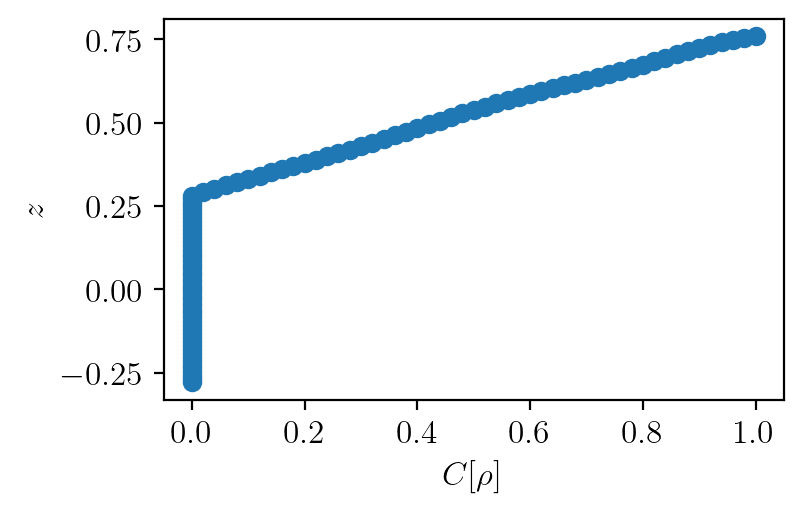

In [275]:
fig,ax = plt.subplots()
ax.errorbar(np.mean(conc_gamma_arr_10,axis=1),np.mean(z_mean_gamma_10,axis=1),np.std(z_mean_gamma_10,axis=1),ls='',marker="o",capsize=0, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
# ax.plot(np.mean(conc_gamma_arr_10,axis=1), np.mean(linear_fit(conc_gamma_arr_10.flatten(),np.abs(z_mean_gamma_10).flatten())[0] ,axis=1),c="black")


ax.set_xlabel("$C[\\rho]$")
ax.set_ylabel("$z$")

array([[0.9692147, 0.9692147, 0.9692147, ..., 0.9692147, 0.9692147,
        0.9692147],
       [0.9586586, 0.9586586, 0.9586586, ..., 0.9586586, 0.9586586,
        0.9586586],
       [0.9462588, 0.9462588, 0.9462588, ..., 0.9462588, 0.9462588,
        0.9462588],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [276]:
gamma_positive_conc_inx = conc_gamma_arr>0
x_fit_gamma = z_mean_gamma.flatten()[gamma_positive_conc_inx]
y_fit_gamma = conc_gamma_arr[gamma_positive_conc_inx]

fit_obj = np.polyfit(x_fit_gamma, y_fit_gamma, 1)
fit_pred = np.poly1d(fit_obj)

x_gamma = np.reshape(gamma_10,(101,10))
y_gamma = np.reshape(fit_pred(z_mean_gamma_10.flatten()),(101,10))

In [318]:
# z_mean_gamma, _, _ = vae_noisy.encoder.predict(rho_gamma)
# offset = 1-z_mean_gamma.flatten()[0]
# test = (1-gamma)*z_mean_gamma.flatten() #+ gamma/2
# test = z_mean_gamma.flatten()*2 + (1-z_mean_gamma.flatten()[0]*2)
# rr_arr = np.array([qt.entropy_vn(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]]).ptrace(1)) for dm in rho_gamma])
# test_10 = z_mean_gamma_10.flatten()*2 + (1-z_mean_gamma_10.flatten()[0]*2)
# test_10 = z_mean_gamma_10.flatten()*2.01267278 -0.52129492

<ErrorbarContainer object of 3 artists>

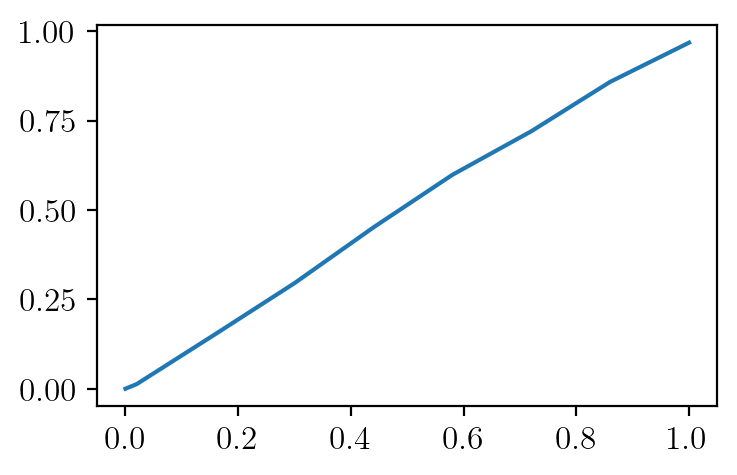

In [280]:

plt.errorbar(conc_gamma_arr[::7],np.maximum(np.mean(y_gamma,axis=1)[::7],0),np.maximum(np.std(y_gamma,axis=1)[::7],0))

Text(0, 0.5, '$C$ without max')

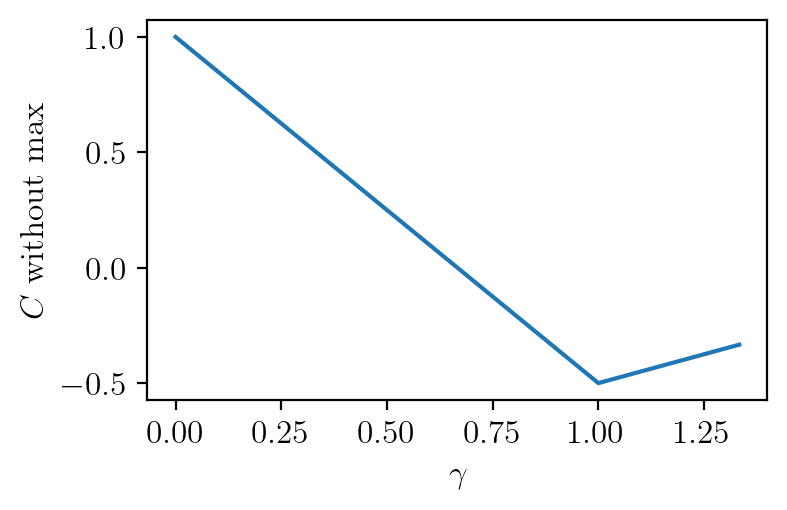

In [349]:
def c_test(rho):

    sysy = qt.tensor(qt.sigmay(), qt.sigmay())

    rho_tilde = (rho * sysy) * (rho.conj() * sysy)

    evals = rho_tilde.eigenenergies()

    # abs to avoid problems with sqrt for very small negative numbers
    evals = abs(np.sort(np.real(evals)))

    lsum = np.sqrt(evals[3]) - np.sqrt(evals[2]) - np.sqrt(evals[1]) - np.sqrt(evals[0])

    return lsum

test_c = np.array([c_test(qt.Qobj(np.reshape(dm,(4,4)),dims=[[2,2],[2,2]])) for dm in rho_gamma])
plt.plot(gamma,test_c)
# plt.plot(gamma,np.mean(y_gamma,axis=1)[:])
plt.plot()
plt.xlabel("$\\gamma$")
plt.ylabel("$C$ without max")

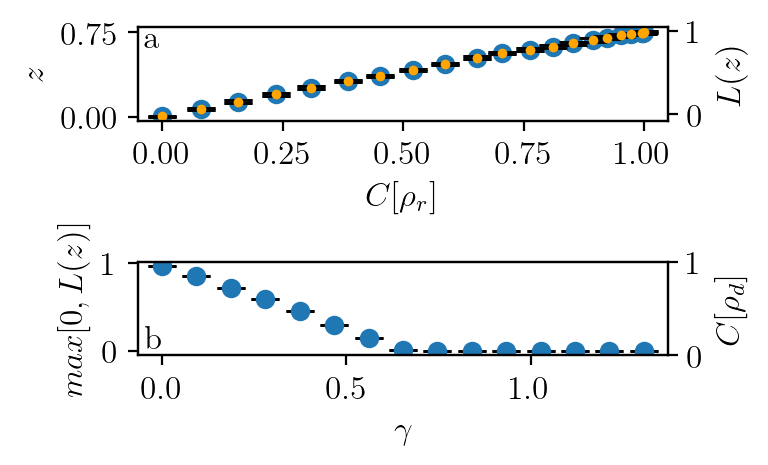

In [278]:
fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1*fig_size_dim/golden_ratio))

ax[0].errorbar(np.mean(concur_arr_rc,axis=1),np.mean(np.abs(np.reshape(z_mean_rc,(21,10))),axis=1),np.std(np.abs(np.reshape(z_mean_rc,(21,10))),axis=1) ,ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_r(\\alpha)\ \\beta=0.75$")
ax12 = ax[0].twinx()
ax12.errorbar(np.mean(concur_arr_rc,axis=1),np.mean(pred_conc_rc,axis=1),np.std(pred_conc_rc,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="orange",
             )

# ax[1].errorbar(x_gamma[:,0][::7],np.mean(y_gamma,axis=1)[::7],np.std(y_gamma,axis=1)[::7],ls='',marker="o",capsize=5, capthick=1, ecolor='black',
#               label="$\\rho_d(\\alpha)$",zorder=-1)
ax[1].errorbar(x_gamma[:,0][::7],np.maximum(np.mean(y_gamma,axis=1)[::7],0),np.maximum(np.std(y_gamma,axis=1)[::7],0),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_d(\\alpha)$",zorder=-1)
# ax[1].errorbar(conc_gamma_arr[::7],(np.mean(y_gamma,axis=1)[::7]),(np.std(y_gamma,axis=1)[::7]),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
#               label="$\\rho_d(\\alpha)$",zorder=-1)


# ax[1].scatter(gamma[::7],conc_gamma_arr[::7],color="orange", label="$C[\\rho(\\alpha)]$",s = 5,zorder=1)
ax22 = ax[1].twinx()

# ax22.set_ylim([-1,1])


ax[1].set_xlabel("$\\gamma$")
ax[0].set_xlabel("$C[\\rho_r]$")

ax[0].set_ylabel("$z$")
ax12.set_ylabel("$L(z)$")
ax[1].set_ylabel("$max[0,L(z)]$")
ax22.set_ylabel("$C[\\rho_d]$")

ax[0].annotate("a",xy=(0.012, 0.78), xycoords='axes fraction')
ax[1].annotate("b",xy=(0.012, 0.075), xycoords='axes fraction')

ax[0].set_yticks([0,0.75])

ax22.set_yticks([0,1])

# ax22.set_ylim([-0.1,1.1])
# ax[1].set_ylim([-0.1,1.1])
plt.tight_layout()

# plt.savefig("/home/felix/Downloads/fig_exp5.pdf",bbox_inches="tight",pad_inches=0.1)

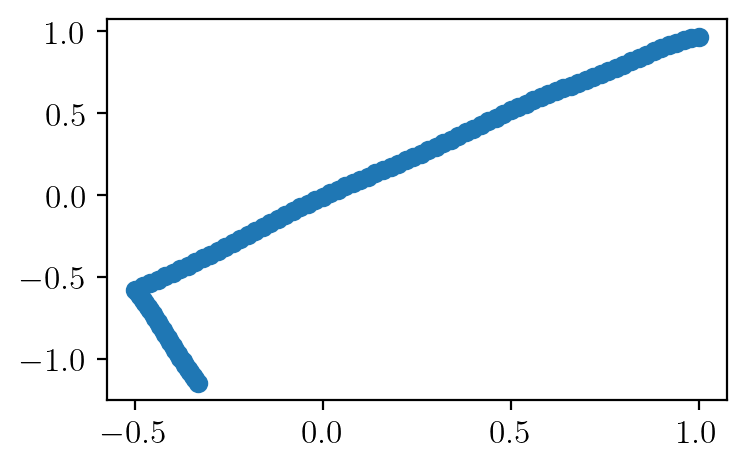

In [493]:
plt.scatter(test_c,np.mean(y_gamma,axis=1))

In [385]:
slope, intercept, r_value, p_value, std_err = linregress(np.mean(concur_arr_rc,axis=1),np.mean(np.abs(np.reshape(z_mean_rc,(21,10))),axis=1))
r_value**2

0.998101066690799

In [386]:
slope, intercept, r_value, p_value, std_err = linregress(conc_gamma_arr[::7],np.maximum(np.mean(y_gamma,axis=1)[::7],0))
r_value**2

0.9991781154223985

Text(0, 0.5, 'PPT')

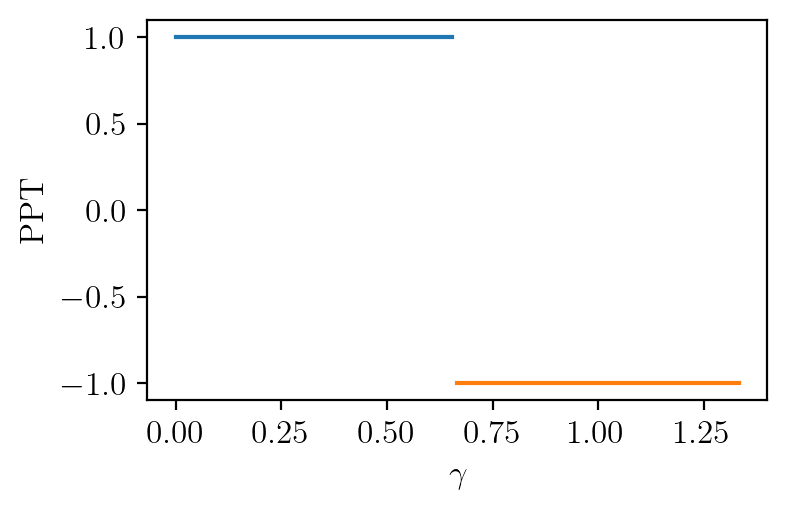

In [28]:
partial_transpose_arr = np.array([qt.partial_transpose(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]]),[1,0]).eigenenergies() for dm in rho_gamma])
positive_inx = np.array([np.any(t < 0) for t in partial_transpose_arr])
negative_inx = np.array([np.any(t < 0) for t in partial_transpose_arr])

plt.plot(gamma[positive_inx],np.ones(len(gamma[positive_inx])),)
plt.plot(gamma[~positive_inx],-1*np.ones(len(gamma[~positive_inx])))
plt.xlabel("$\\gamma$")
plt.ylabel("PPT")

In [282]:
# rho_arr_noiseless = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
# _, X_test_noiseless, _, y_test_noiseless = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
# z_mean_noiseless, _, _ = vae_noisy.encoder.predict(X_test_noiseless)

# fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

# sort_inx = np.argsort(y_test)

# ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000])/np.log(2),"-o", label="$Z_0$") 
# ax.plot(y_test[sort_inx][::1000], z_mean_noiseless[sort_inx][:,0][::1000]/np.log(2),"-o", label=" $\\tilde{Z}_0$") 


# ax.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

# # ax.plot(y_test[sort_inx][::1000],rr_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")


# # ax2 = ax.twinx()

# # ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

# ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
# ax.set_xlabel("Angle $\\alpha$",fontsize=12)
# ax2.set_ylabel("Concurrence",fontsize=12)

# fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

# rho_arr_deco = np.load('unitary_4x4_101_1000_deco_01.npy', mmap_mode="r")
# _, X_test_deco, _, y_test_deco = train_test_split(rho_arr_deco, alpha_arr, random_state=42)
# z_mean_deco, _, _ = vae.encoder.predict(X_test_deco)

# concurrence_deco_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test_deco])

# fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

# sort_inx = np.argsort(y_test)

# ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000]),"-o", label="$Z_0$") 
# ax.plot(y_test[sort_inx][::1000], np.abs(z_mean_deco[sort_inx][:,0][::1000]),"-o", label=" $\\tilde{Z}_0$") 


# ax2 = ax.twinx()

# ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")
# ax2.plot(y_test[sort_inx][::1000],concurrence_deco_arr[sort_inx][::1000],"-o", c="red",label= "$\\tilde{C(\\rho)}$")


# ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
# ax.set_xlabel("Angle $\\alpha$",fontsize=12)
# ax2.set_ylabel("Concurrence",fontsize=12)

# fig.legend(bbox_to_anchor=(1.1, 0.65), loc=2)

# from qiskit.quantum_info import Statevector, DensityMatrix, entropy, partial_trace
# from qiskit import QuantumRegister, ClassicalRegister
# from qiskit import QuantumCircuit, execute

# def circuit(theta):
#     q = QuantumRegister(2,'q')
#     circuit = QuantumCircuit(q)
#     circuit.h(q[0])
#     circuit.cry(theta,q[0],q[1])
#     return circuit

# def get_dm(theta):
#     state = Statevector.from_int(0, 2**2)
#     state = state.evolve(circuit(theta))
#     return DensityMatrix(state)


# def get_u(n):
#     z = np.random.randn(n,n)/np.sqrt(2.0)
#     q,r = np.linalg.qr(z)
#     d = np.diagonal(r)
#     ph = d/np.absolute(d)
#     q = np.multiply(q,ph,q)
#     return q

# def apply_u(dm):
#     UaUb = qt.Qobj(np.kron(get_u(2),get_u(2)),dims = [[2, 2], [2, 2]])
#     return  UaUb * dm * UaUb.dag()  

# def gen_angle_circ(n_points, n_samples, max_epsilon):
#     th_scan_template = np.linspace(0, np.pi, n_points)
#     th_scan = np.zeros((n_points, n_samples))
#     for cnt, theta in enumerate(th_scan_template):
#         th_scan[cnt] = theta + max_epsilon * np.random.uniform(-1, 1, size=n_samples)
#     return th_scan

# def apply_deco(alpha, dm):
# #     return alpha*dm  + (1 - alpha)/2**2 * dm.tr() * qt.identity([2,2])
#     return (1 - alpha)*dm  + alpha/2**2 * qt.identity([2,2])

# dm = get_dm(np.pi)

# # r_1 = apply_deco(0,apply_u( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
# # r_2 = apply_deco(0.1,apply_u( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))


# r_1 = apply_deco(0,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
# r_2 = apply_deco(0.1,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
# r_3 = apply_deco(0.2,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))

# r_4 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real
# r_5 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real
# r_6 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real

# r_4_arr = r_4.full().real.flatten()
# r_5_arr = r_5.full().real.flatten()
# r_6_arr = r_6.full().real.flatten()

# qt.concurrence(r_4), qt.concurrence(r_5), 


# test_arr = [qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]]) for i in range(100)]
# test_a = [i.full().real.flatten() for i in test_arr]
# c_a = [qt.concurrence(i) for i in test_arr]

# z_m, _, _ = vae_noisy.encoder.predict(np.array(test_a))
# z_m, _, _ = vae_noisy.encoder.predict(np.array([r_1_arr,r_2_arr,r_3_arr]))

# Beta Scan

In [112]:
inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}
beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

In [64]:
z_mean_beta[:,sort_inx[-1]][::10].shape

(2525,)

In [96]:
def gen_two_largest_z(beta):

    beta_inx = str(beta).replace(".","")
    
    learning_rate = 0.0001
    lat_dim = 8
    hidden_act = "tanh"
    final_act = "linear"

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format(beta_inx))
    decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format(beta_inx))

    vae_beta = VAE(encoder, decoder, beta)
    vae_beta.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae_beta.fit(X_test_noisy, epochs=1, batch_size=64, verbose=0) 
    z_mean_beta, z_log_var_beta, z_beta = vae_beta.encoder.predict(X_test_noisy)
        
    temp_arr = np.zeros(8)
    for i in range(8):
            temp_arr[i] = np.average(kl_loss(z_mean_beta[:,i], z_log_var_beta[:,i]))
    sort_inx = np.argsort(temp_arr)

#     for (i,j) in zip(np.arange(8)[sort_inx], temp_arr[sort_inx]):
#         print(i,j)

    return z_mean_beta[:,sort_inx[-1]][::1], z_mean_beta[:,sort_inx[-2]][::1]

790/790 [==============================] - 0s 435us/step


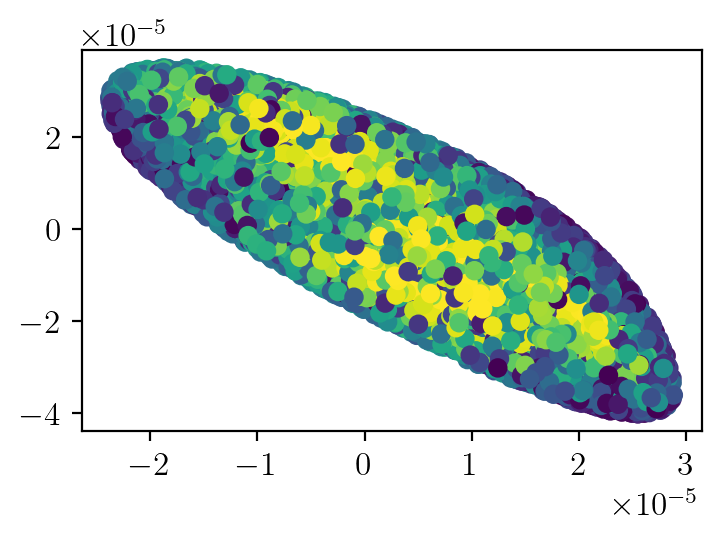

In [107]:
z_001_0, z_001_1 = gen_two_largest_z(0.01)
plt.scatter(z_001_0, z_001_1,c=concurrence_noisy_arr[::1])


z_04_0, z_04_1 = gen_two_largest_z(0.4)
plt.scatter(z_04_0, z_04_1,c=concurrence_noisy_arr[::1])

z_07_0, z_07_1 = gen_two_largest_z(0.7)
plt.scatter(z_07_0, z_07_1,c=concurrence_noisy_arr[::1])

z_1_0, z_1_1 = gen_two_largest_z(1.0)
plt.scatter(z_1_0, z_1_1,c=concurrence_noisy_arr[::1])

790/790 [==============================] - 0s 445us/step


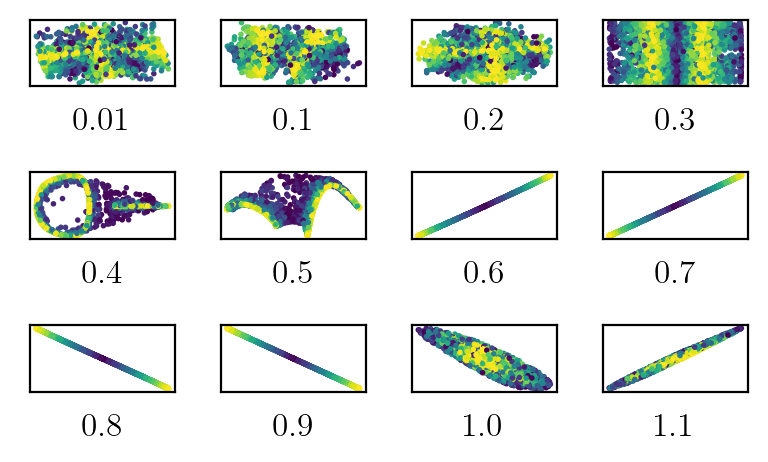

In [89]:
columns = 4
rows = 3
cnt = 0 
fig, ax_array = plt.subplots(rows, columns,squeeze=False)
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_yticks([])
        axes.set_xticks([])
        x_scatter, y_scatter = gen_two_largest_z(list(inx_dict.values())[cnt])
        axes.scatter(x_scatter, y_scatter,c=concurrence_noisy_arr[::10],s=1)
        axes.set_xlabel("$"+str(list(inx_dict.values())[cnt])+"$")
        cnt += 1
plt.tight_layout()
plt.show()

In [111]:
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))
full_kl_loss_arr_2 = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format(inx))
    decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format(inx))

    vae_beta = VAE(encoder, decoder, beta)
    vae_beta.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae_beta.fit(X_test_noisy, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean_beta, z_log_var_beta, z_beta = vae_beta.encoder.predict(X_test_noisy)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean_beta[:,i].astype(np.float64), z_log_var_beta[:,i].astype(np.float64)).astype(np.float64))
        full_kl_loss_arr_2[cnt][i] = np.average(kl_loss(z_mean_beta[:,i], z_log_var_beta[:,i]))

    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

790/790 [==============================] - 0s 479us/step


In [108]:
# fig, ax = plt.subplots(figsize=(4, 3),dpi=150)
# im = ax.scatter(kl_loss_arr, recon_loss_arr, c=list(inx_dict.values()))
# cbar = fig.colorbar(im)
# cbar.set_label("$\\beta$")
# plt.xlabel("KL Loss")
# plt.ylabel("Reconstruction Loss")

# for i, txt in enumerate(inx_dict.values()):
#     ax.annotate(txt, (kl_loss_arr[i], recon_loss_arr[i]))
# plt.show()

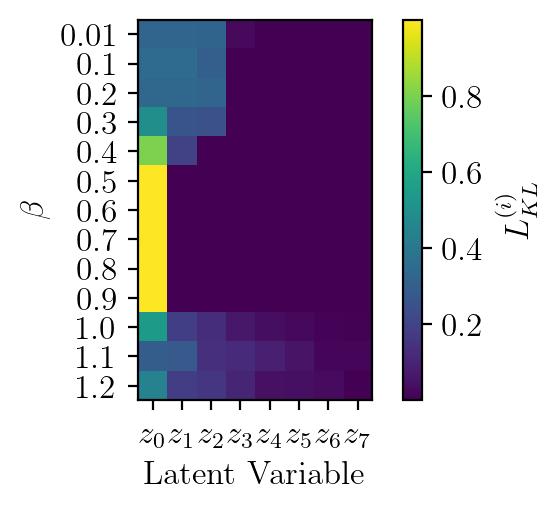

In [115]:
row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

# row_sums = np.sort(full_kl_loss_arr_2,axis=-1).sum(axis=1)
# new_matrix = np.sort(full_kl_loss_arr_2,axis=-1) / row_sums[:, np.newaxis]

fig, ax = plt.subplots()
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

Text(0.5, 0.565, '$\\mathcal{L}_{KL}^{(i)}$')

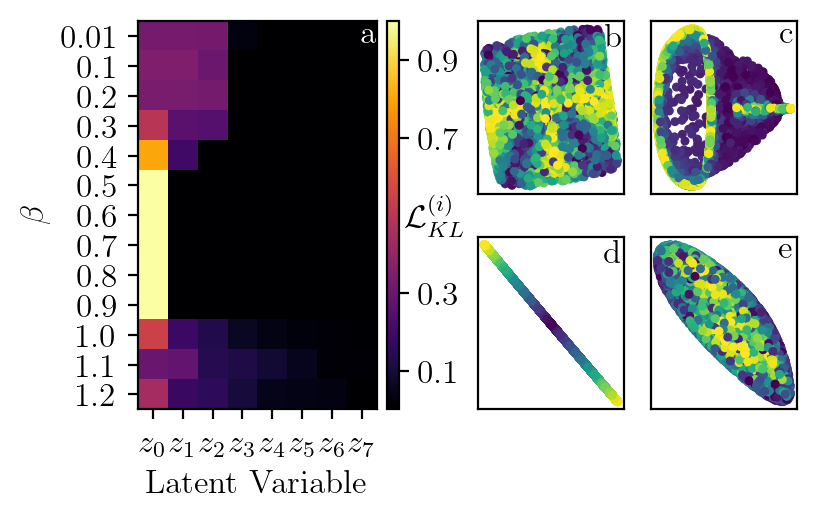

In [124]:
fig = plt.figure(constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'Top1','Top2'],['Left', 'Bottom1','Bottom2']],
                          gridspec_kw={'width_ratios':[2,0.8,0.8]})


im = axs['Left'].imshow(np.flip(new_matrix,axis=1),cmap="inferno")

divider = make_axes_locatable(axs['Left'])
cax = divider.append_axes('right', size='5%', pad=0.05)

cbar = plt.colorbar(im, cax=cax, orientation='vertical')
cbar.set_ticks([0.1,0.3,0.7,0.9])

axs['Left'].set_xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
axs['Left'].set_yticks(range(len(inx_dict)),["${}$".format(i) for i in beta_list])     

axs['Left'].set_xlabel("Latent Variable")
axs['Left'].set_ylabel("$\\beta$")

axs["Top1"].set_xticks([])
axs["Top1"].set_yticks([])
axs["Top2"].set_xticks([])
axs["Top2"].set_yticks([])
axs["Bottom1"].set_xticks([])
axs["Bottom1"].set_yticks([])
axs["Bottom2"].set_xticks([])
axs["Bottom2"].set_yticks([])

axs["Top1"].scatter(z_001_0,z_001_1, c= concurrence_noisy_arr,s=5)
axs["Top2"].scatter(z_04_0,z_04_1, c= concurrence_noisy_arr,s=5)
axs["Bottom1"].scatter(z_07_0,-z_07_1, c= concurrence_noisy_arr,s=5)
axs["Bottom2"].scatter(z_1_0,z_1_1, c= concurrence_noisy_arr,s=5)

fig.text(0.444, 0.94, "a",c="white")
fig.text(0.748, 0.932, "b")
fig.text(0.968, 0.94, "c")

fig.text(0.748, 0.495, "d")
fig.text(0.966, 0.505, "e")

fig.text(0.5,0.565,"$\\mathcal{L}_{KL}^{(i)}$")

# plt.savefig("/home/felix/Downloads/fig_exp3.pdf",bbox_inches="tight",pad_inches=0.1)

# Concurrence

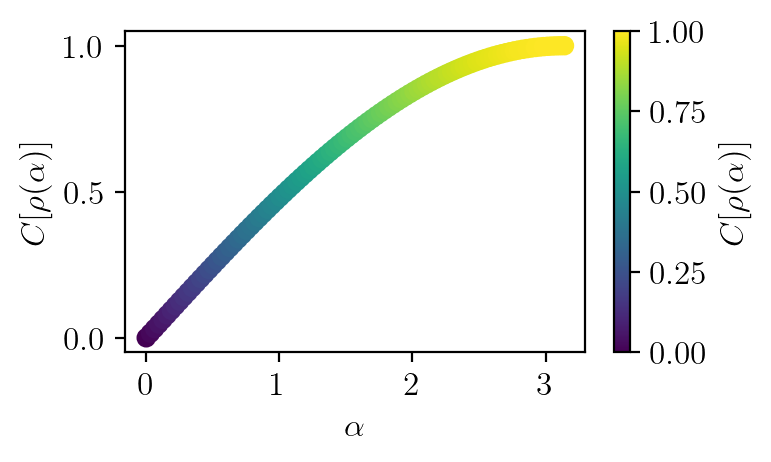

In [24]:
X_train, X_test, y_train, y_test = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
conc_plot = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])
conc_plot = np.unique(conc_plot)
fig,ax = plt.subplots()
im = ax.scatter(scan_arr,conc_plot,c=conc_plot)
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$C[\\rho(\\alpha)]$")
cbar = fig.colorbar(im)
cbar.set_label("$C[\\rho(\\alpha)]$")
plt.tight_layout()
# plt.savefig("/home/felix/Downloads/fig10_concurrence.pdf")

# 8 LV with ramp

In [125]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [138]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 529us/step


/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


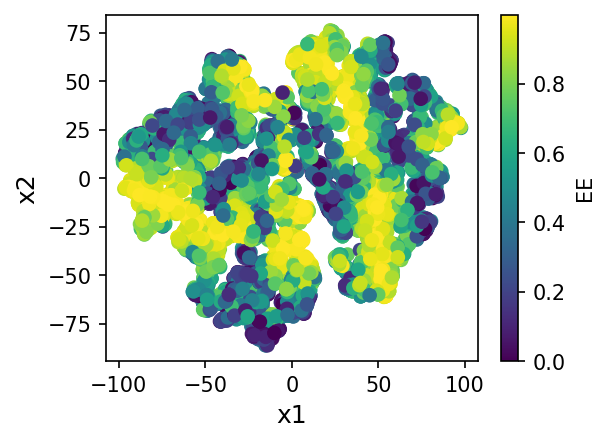

In [140]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:10000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:10000],"x1","x2","concurrence", 1)

# 8 LV without ramp

In [133]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [134]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_noramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_noramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 534us/step


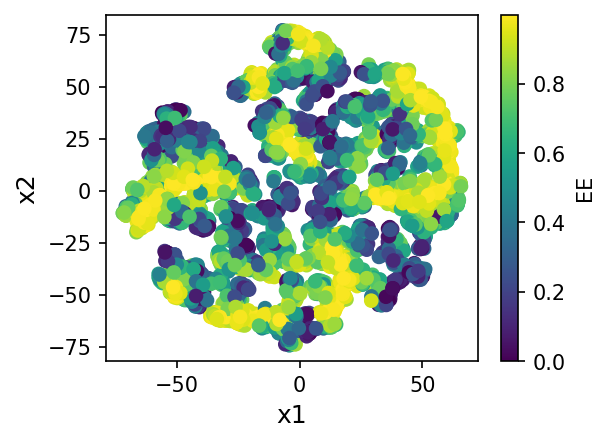

In [136]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:5000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:5000],"x1","x2","EE", 1)